In [1]:
from fastai.vision.all import *
import pandas as pd
import numpy as np
import os


In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'


In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"premsaishyamvantaram","key":"17b594b727ab9032bc494ded807417df"}'}

In [4]:
if not os.path.exists("/content/chest-xray-pneumonia.zip"):
    !kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:12<00:00, 245MB/s]
100% 2.29G/2.29G [00:12<00:00, 192MB/s]


In [5]:
if not os.path.exists("/content/chest_xray"):
    !unzip -q /content/chest-xray-pneumonia.zip -d /content/chest_xray


In [6]:
path = Path('/content/chest_xray/chest_xray')
path.ls()


(#5) [Path('/content/chest_xray/chest_xray/val'),Path('/content/chest_xray/chest_xray/chest_xray'),Path('/content/chest_xray/chest_xray/train'),Path('/content/chest_xray/chest_xray/test'),Path('/content/chest_xray/chest_xray/__MACOSX')]

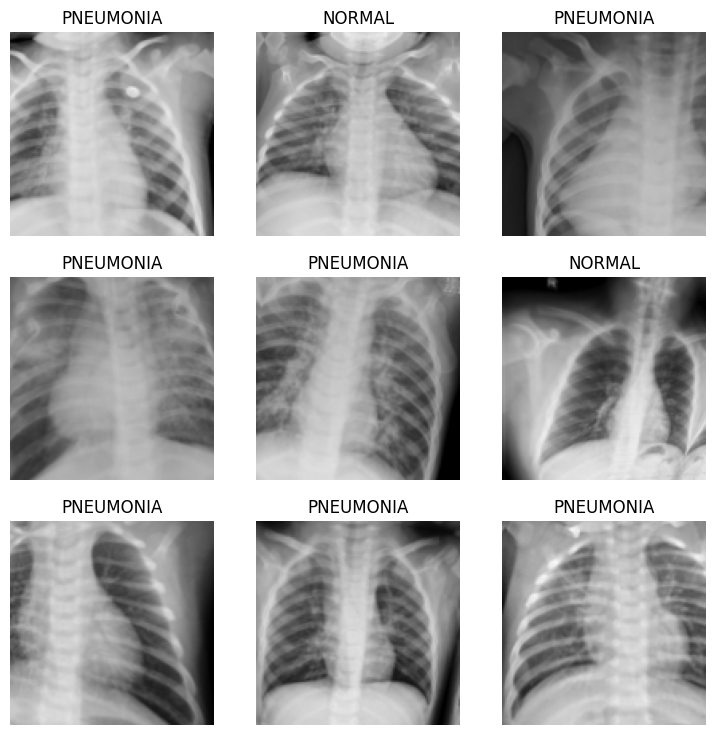

In [7]:
dls = ImageDataLoaders.from_folder(
    path,
    train='train',
    valid='val',
    valid_pct=None,
    item_tfms=Resize(128),
    batch_tfms=aug_transforms(),
    bs=16
)
dls.show_batch(max_n=9)


In [9]:
import torch.nn as nn
from fastai.vision.all import *

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64 * 16 * 16, 2)  # 128x128 input → 16x16 after 3 poolings
        )

    def forward(self, x): return self.model(x)

learn = Learner(dls, SimpleCNN(), loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.fit(3)


epoch,train_loss,valid_loss,accuracy,time
0,0.241766,0.419849,0.812500,01:32
1,0.168235,0.632521,0.750000,01:29
2,0.173985,0.383258,0.750000,01:30


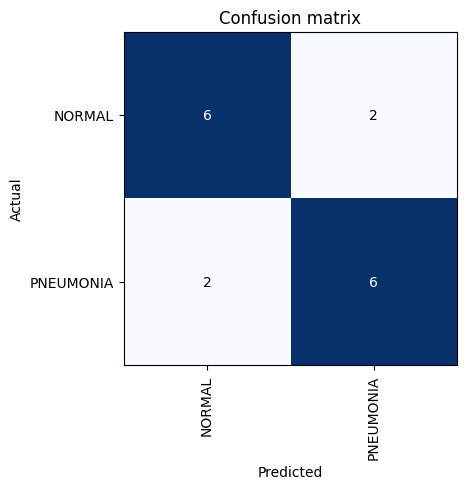

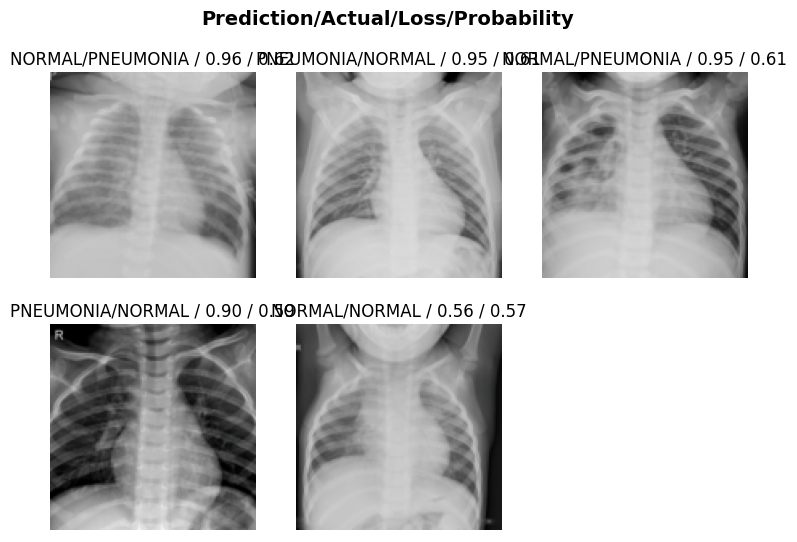

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5)


In [11]:
test_path = path/'test'
test_dl = dls.test_dl(get_image_files(test_path))
preds, _ = learn.get_preds(dl=test_dl)
pred_labels = preds.argmax(dim=1)
pred_labels


tensor([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,